# 라이브러리 불러오기

In [2]:
import cv2
import os
import pyautogui

from matplotlib import pyplot as plt
import numpy as np
import time

from IPython.display import Image

import torch
import torchvision
import torchvision.datasets   as dsets
import torchvision.transforms as transforms
import torch.nn.init

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [3]:
# from torch.utils.data import TensorDataset # 텐서데이터셋
# from torch.utils.data import DataLoader # 데이터로더

# x_train  =  torch.FloatTensor([[73,  80,  75], 
#                                [93,  88,  93], 
#                                [89,  91,  90], 
#                                [96,  98,  100],   
#                                [73,  66,  70]])  
# y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# dataset = TensorDataset(x_train, y_train)
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 숫자인식기

In [5]:
img_root     = os.path.join("images")
images       = []
time_train_x = []
time_train_y = []
device       = 'cuda' if torch.cuda.is_available() else 'cpu'

# 0~9까지여야 함
# image size:(20 * 10)
for n in range(1, 10):
    img_path = f"{img_root}/number{n}.png"
    image      = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    time_train_x.append(image[75:95, 977:987])
    time_train_y.append(n)
    images.append(image)
    
time_train_x = torch.FloatTensor(time_train_x)
time_train_y = torch.FloatTensor(time_train_y)

dataset     = TensorDataset(time_train_x, time_train_y)
data_loader = DataLoader(dataset, batch_size=1, num_workers=1, shuffle=True)


# mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
#                           train=True, # True를 지정하면 훈련 데이터로 다운로드
#                           transform=transforms.ToTensor(), # 텐서로 변환
#                           download=True)

time_train_x.size()

torch.Size([9, 20, 10])

In [6]:
# batch_size  = 10

# 200은 이미지 한 장의 크기 20 * 10, 10은 label 값의 종류 수
linear = torch.nn.Linear(200, 10, bias=True).to(device)
loss   = torch.nn.CrossEntropyLoss().to(device)
SDG    = torch.optim.SGD(linear.parameters(), lr=0.1)

total_batch     = len(data_loader)
training_epochs = 500 # 400개 정도하면 정확도 100퍼

for epoch in range(training_epochs):
    total_cost = 0
    for X, Y in data_loader:
        X = X.view(-1, 20 * 10).to(device)
        Y = Y.to(device).long()
        
        hypothesis = linear(X)
        cost = loss(hypothesis, Y)
        SDG.zero_grad()
        cost.backward()
        SDG.step()
        total_cost += cost 
    avg_cost = total_cost / total_batch
    if (epoch + 1) % 10 == 0:
        print("Epoch:", "%03d" % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))

Epoch: 010 cost = 86636.843750000
Epoch: 020 cost = 63755.882812500
Epoch: 030 cost = 70884.929687500
Epoch: 040 cost = 65372.792968750
Epoch: 050 cost = 63328.644531250
Epoch: 060 cost = 63686.859375000
Epoch: 070 cost = 84332.085937500
Epoch: 080 cost = 56784.070312500
Epoch: 090 cost = 50241.109375000
Epoch: 100 cost = 64642.421875000
Epoch: 110 cost = 59262.992187500
Epoch: 120 cost = 54891.457031250
Epoch: 130 cost = 65395.554687500
Epoch: 140 cost = 61820.328125000
Epoch: 150 cost = 40621.109375000
Epoch: 160 cost = 52659.667968750
Epoch: 170 cost = 56143.171875000
Epoch: 180 cost = 18705.945312500
Epoch: 190 cost = 42042.371093750
Epoch: 200 cost = 51184.203125000
Epoch: 210 cost = 58321.453125000
Epoch: 220 cost = 54611.785156250
Epoch: 230 cost = 59315.019531250
Epoch: 240 cost = 55570.406250000
Epoch: 250 cost = 44073.722656250
Epoch: 260 cost = 52187.847656250
Epoch: 270 cost = 38689.230468750
Epoch: 280 cost = 27872.164062500
Epoch: 290 cost = 44671.304687500
Epoch: 300 cos

In [11]:
# # 학습을 진행하지 않을 것이므로 torch.no_grad()
# with torch.no_grad():
#     X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
#     Y_test = mnist_test.test_labels.to(device)

#     prediction = model(X_test)
#     correct_prediction = torch.argmax(prediction, 1) == Y_test
#     accuracy = correct_prediction.float().mean()
#     print('Accuracy:', accuracy.item())

# x_test = time_train_x.view(len(time_train_x), 20, 10).float().to(device)
x_test = time_train_x.view(-1, 200).float().to(device)
y_test = time_train_y.to(device)

prediction         = linear(x_test)
correct_prediction = torch.argmax(prediction, 1)

In [13]:
with torch.no_grad():
    X_test = time_train_x.view(-1, 200).float().to(device)
    Y_test = time_train_y.to(device)
    
    # torch.argmax(prediction, 1) 하면 모델의 예측 숫자를 알 수 있다.
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 1.0


In [17]:
# time_train_y
# prediction
correct_prediction
torch.argmax(prediction, 1)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [214]:
# # [75:95, 940:990]

# ones_sec    = img1[75:95, 977:987] # 0
# tens_sec    = img1[75:95, 967:977] # 3
# ones_minute = img1[75:95, 944:954] # 0
# tens_minute = img1[75:95, 954:964] # 1

# time_img = [ones_sec, tens_sec, 
#             ones_minute, tens_minute]

# plt.imshow(tens_minute)

In [18]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

# 매크로
- m1 디스플레이 1440 * 900

In [97]:
def get_mouse_position(interval=2):
    time.sleep(interval)
    position = pyautogui.position()
    
    return position

In [123]:
get_mouse_position(interval=3)

# # 현재 디스플레이 크기
# print(pyautogui.size())

# # x, y 좌표
# print(position.x)
# print(position.y)

Point(x=1053, y=171)

In [124]:
summoner_search_bar = pyautogui.Point(904, 159)
match_record        = pyautogui.Point(x=487, y=154)
close_button        = pyautogui.Point(x=1105, y=137)
delete_search       = pyautogui.Point(x=1053, y=171)

replay_x           = 820
replay_y           = 310
replay_y_tolerance = 80
replay_buttons     = [pyautogui.Point(replay_x, replay_y + (replay_y_tolerance * index)) for index in range(6)]

In [150]:
time.sleep(1.5)
pyautogui.moveTo(summoner_search_bar)
pyautogui.click()
pyautogui.write('hide on bush')
pyautogui.press('enter')

time.sleep(2)
pyautogui.moveTo(match_record)
pyautogui.click()

# for replay_button in replay_buttons:
#     pyautogui.moveTo(replay_button)
#     time.sleep(0.5)
#     pyautogui.click()

In [53]:
# 마우스 이동 (x 좌표, y 좌표)
# pyautogui.moveTo(500, 900)

# # 마우스 이동 (x 좌표, y 좌표 2초간)
# pyautogui.moveTo(100, 100, 2)  

# # 마우스 이동 ( 현재위치에서 )
# pyautogui.moveRel(200, 300, 2)

# # 마우스 클릭
# pyautogui.click()

# # 2초 간격으로 2번 클릭
# pyautogui.click(clicks= 2, interval=2)

# # 더블 클릭
# pyautogui.doubleClick()

# # 오른쪽 클릭
# pyautogui.click(button='right')

# # 스크롤하기 
# pyautogui.scroll(10)

# # 드래그하기
# pyautogui.drag(0, 300, 1, button='left')

# pyautogui.press('enter', presses=3, interval=3) # enter 키를 3초에 한번씩 세번 입력합니다.

# pyautogui.write('hello world!', interval=0.25) # 각 문자를 0.25마다 타이핑합니다. 

In [ ]:
# pyautogui.screenshot(f"images/sample.png")

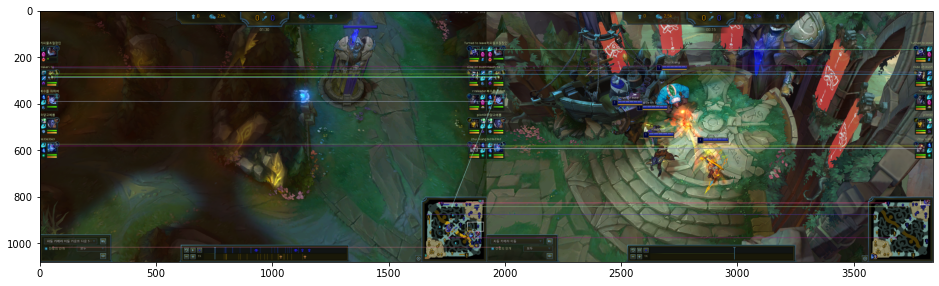

In [151]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
    
    
plt.figure(figsize=(16, 12))
knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
plt.imshow(knn_image)
plt.show()